# Sendy Regression Challenge

## Introduction

## Importing the libraries

In [952]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

## Importing the dataset

In [786]:
Train = pd.read_csv('Train.csv')
Riders = pd.read_csv('Riders.csv')
Test = pd.read_csv('Test.csv')

## EDA

In [946]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [948]:
Riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


## Merging the Train and Riders set for more analysis.

In [787]:
total = Train.merge(Riders, how='left', on='Rider Id')

In [788]:
#Creating New Column(I want Dependant variable to be last column of the dataframe)
total['Time from Pickup to Arrival New']= total['Time from Pickup to Arrival']

#Dropping the Old-duplicate Y column
total = total.drop(['Time from Pickup to Arrival'], axis=1)

#Renaming the column back to Time from Pickup to Arrival
total.rename(columns={'Time from Pickup to Arrival New':'Time from Pickup to Arrival'}, inplace=True)

In [789]:
#Dropping other unneeded columns [Vehihle Type(Only Bikes), User Id(Object)]
total = total.drop(['Vehicle Type'], axis=1)
total = total.drop(['User Id'], axis=1)

In [953]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Order No                                   21201 non-null  object        
 1   Platform Type                              21201 non-null  int64         
 2   Personal or Business                       21201 non-null  object        
 3   Placement - Day of Month                   21201 non-null  int64         
 4   Placement - Weekday (Mo = 1)               21201 non-null  int64         
 5   Placement - Time                           21201 non-null  datetime64[ns]
 6   Confirmation - Day of Month                21201 non-null  int64         
 7   Confirmation - Weekday (Mo = 1)            21201 non-null  int64         
 8   Confirmation - Time                        21201 non-null  datetime64[ns]
 9   Arrival at Pickup

In [950]:
total.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,21201.0,15.653696,8.798916,1.000000,8.000000,15.000000,23.000000,31.000000
Placement - Weekday (Mo = 1),21201.0,3.240083,1.567295,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Destination - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000


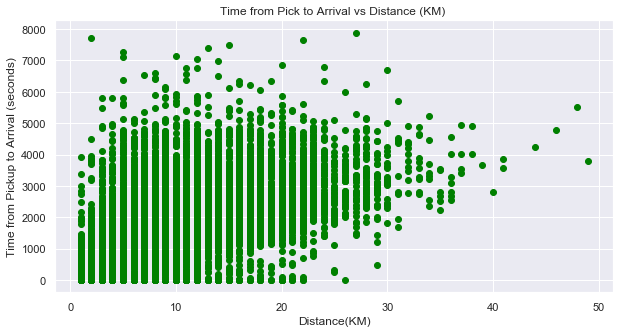

In [956]:
# Plotting the relationship between Time from Pickup to Arrival and distance(KM)

sns.set()
_ = plt.figure(figsize = (10,5))
_ = plt.scatter(total.iloc[:,18],total.iloc[:,30], color = 'green')
_ = plt.title('Time from Pick to Arrival vs Distance (KM) ')
_ = plt.xlabel('Distance(KM)')
_ = plt.ylabel('Time from Pickup to Arrival (seconds)')
plt.show()

In [791]:
X = total.iloc[:, :-1].values
y = total.iloc[:, -1].values

## Taking care of missing data

In [793]:
#Distance and Temperature -Replace null values with mean of the column
from sklearn.impute import SimpleImputer
imp_temp = SimpleImputer(missing_values = np.nan, strategy='mean')
imp_temp.fit(total.iloc[:, 18:20]) 
total.iloc[:, 18:20] = imp_temp.transform(total.iloc[:, 18:20])

In [794]:
#Precipitation(ml) - Replace null values with Zero(0 ml railfall)
from sklearn.impute import SimpleImputer
imp_prec = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)
imp_prec.fit(total.iloc[:,20:]) 
total.iloc[:,20:] = imp_prec.transform(total.iloc[:,20:])

## Changing datatype


In [795]:
#Changing times columns into datetime datatype
total['Placement - Time'] = pd.to_datetime(total['Placement - Time'])
total['Confirmation - Time'] = pd.to_datetime(total['Confirmation - Time'])
total['Arrival at Pickup - Time'] = pd.to_datetime(total['Arrival at Pickup - Time'])
total['Pickup - Time'] = pd.to_datetime(total['Pickup - Time'])
total['Arrival at Destination - Time'] = pd.to_datetime(total['Arrival at Destination - Time'])

## Encoding categorical data

In [796]:
#1 Hot Encode the Personal or Business column - Business=1 and Personal=0
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [855]:
#Drop columns not wanted to be part of the model
total_model = total.iloc[:, 12:]
total_model.drop('Rider Id', axis=1, inplace=True)
total_model.drop('Arrival at Destination - Time', axis=1, inplace=True)
total_model.drop('Pickup - Time', axis=1, inplace=True)
#total_model.drop('Pickup Long', axis=1, inplace=True)
#total_model.drop('Pickup Lat', axis=1, inplace=True)
#total_model.drop('Destination Lat', axis=1, inplace=True)
#total_model.drop('Destination Long', axis=1, inplace=True)
#total_model.drop('No_Of_Orders', axis=1, inplace=True)
total_model.drop('Age', axis=1, inplace=True)
#total_model.drop('Average_Rating', axis=1, inplace=True)
total_model.drop('No_of_Ratings', axis=1, inplace=True)

#Create Metrics of features(Independant Variables- X) and Dependant Variable(y)
X = total_model.iloc[:,:-1]
y = total_model.iloc[:,-1]

total_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Pickup - Day of Month                      21201 non-null  int64  
 1   Pickup - Weekday (Mo = 1)                  21201 non-null  int64  
 2   Arrival at Destination - Day of Month      21201 non-null  int64  
 3   Arrival at Destination - Weekday (Mo = 1)  21201 non-null  int64  
 4   Distance (KM)                              21201 non-null  float64
 5   Temperature                                21201 non-null  float64
 6   Precipitation in millimeters               21201 non-null  float64
 7   Pickup Lat                                 21201 non-null  float64
 8   Pickup Long                                21201 non-null  float64
 9   Destination Lat                            21201 non-null  float64
 10  Destination Long      

In [856]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature scaling

In [881]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X[:])
X_train = sc.fit_transform(X_train[:])
X_test = sc.transform(X_test[:])

In [882]:
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Average_Rating,No_of_Ratings
0,-0.756231,1.122885,-0.756231,1.122885,-0.971370,-8.873220e-01,-0.067953,-1.189424,0.509897,-0.511888,0.414159,-0.035206,-0.090082,0.516144
1,-0.415271,1.122885,-0.415271,1.122885,1.145469,9.749159e-01,-0.067953,-2.294056,2.349813,-0.356757,0.070177,-0.823507,-0.308411,-0.675342
2,1.630491,-0.791368,1.630491,-0.791368,-1.147774,1.102666e-15,-0.067953,-0.878981,0.858136,-0.526672,0.379588,-0.425228,-1.509220,-0.563640
3,-0.074311,1.122885,-0.074311,1.122885,-0.089354,-1.259770e+00,-0.067953,0.005523,0.563962,0.730374,-0.361289,-0.512252,0.674069,-0.566123
4,-0.301618,-1.429452,-0.301618,-1.429452,-0.089354,-2.439187e+00,-0.067953,0.487515,-0.510932,-0.357811,-0.031369,0.392929,0.237411,0.476428


## Split into Train and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardise, y, test_size = 0.2, random_state=1, shuffle=False)

## Ridge Regression

In [929]:
# import the ridge regression module from sklearn
from sklearn.linear_model import Ridge
# create ridge model
ridge = Ridge()

## Lasso Regression

In [930]:
# import LASSO module from sklearn
from sklearn.linear_model import Lasso
# create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)


## Training the Regression models on the Training set

In [931]:
# Multiple Linear regression model 
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr = mlr.fit(X_train, y_train)
mlr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [932]:
#Decision tree regression model 
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree = tree.fit(X_train, y_train)
tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [933]:
#Random forest regression model 
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 25)
forest = forest.fit(X_test, y_test)
forest

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [934]:
# LASSO model
lasso.fit(X_train, y_train)
lasso

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [935]:
# Ridge model
ridge.fit(X_train, y_train)
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## Predicting the results

In [936]:
from sklearn import metrics
import math

#Multiple Linear Regression
rmse_test = round(math.sqrt(metrics.mean_squared_error(y_test, mlr.predict(X_test))),2)
rmse_train = round(math.sqrt(metrics.mean_squared_error(y_train, mlr.predict(X_train))),2)

In [937]:
# Decision Tree regression

rmse_test1 = round(math.sqrt(metrics.mean_squared_error(y_test, tree.predict(X_test))),2)
rmse_train1 = round(math.sqrt(metrics.mean_squared_error(y_train, tree.predict(X_train))),2)

In [938]:
# Random forrest regression 

rmse_test2 = round(math.sqrt(metrics.mean_squared_error(y_test, forest.predict(X_test))),2)
rmse_train2 = round(math.sqrt(metrics.mean_squared_error(y_train, forest.predict(X_train))),2)                    

In [939]:
#Lasso Regression

rmse_test3 = round(math.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))),2)
rmse_train3 = round(math.sqrt(metrics.mean_squared_error(y_train, lasso.predict(X_train))),2) 

In [940]:
#Ridge Regression

rmse_test4 = round(math.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))),2)
rmse_train4 = round(math.sqrt(metrics.mean_squared_error(y_train, ridge.predict(X_train))),2) 

In [941]:
data = {'Regression model':  ['MLR', 'D.Tree', 'R.Forest', 'Lasso', 'Ridge'],
        'RMSE Training': [rmse_train, rmse_train1, rmse_train2, rmse_train3, rmse_train4],
        'RMSE Testing' : [rmse_test, rmse_test1, rmse_test2, rmse_test3, rmse_test4]
        }

df = pd.DataFrame (data, columns = ['Regression model', 'RMSE Training', 'RMSE Testing'])
print(df)

  Regression model  RMSE Training  RMSE Testing
0              MLR         802.52        774.16
1           D.Tree           7.96       1092.09
2         R.Forest         805.10        309.52
3            Lasso         802.52        774.16
4            Ridge         802.52        774.16


## Assesing model accurecy

In [942]:
# import metrics module
from sklearn import metrics

In [943]:
# check training accuracy
train_mlr = mlr.predict(X_train)
train_ridge = ridge.predict(X_train)

print('Training MSE')
print('Linear:', metrics.mean_squared_error(y_train, train_mlr))
print('Ridge :', metrics.mean_squared_error(y_train, train_ridge))
print('Lasso :', metrics.mean_squared_error(y_train, train_lasso))

Training MSE
Linear: 644042.5663573907
Ridge : 644042.5685493185
Lasso : 644042.5689331809


In [944]:
#Check testing accuracy
test_mlr = mlr.predict(X_test)
test_ridge = ridge.predict(X_test)

print('Testing MSE')
print('Linear:', metrics.mean_squared_error(y_test, test_mlr))
print('Ridge :', metrics.mean_squared_error(y_test, test_ridge))
print('Lasso :', metrics.mean_squared_error(y_test, test_lasso))

Testing MSE
Linear: 599330.6686594393
Ridge : 599330.6675817544
Lasso : 599330.6404862081


## In comes the Test Dataset

In [904]:
#Prepare Test Data to be tested- Merge with Riders information
testing = Test.merge(Riders, how='left', on='Rider Id')

#Drop unneeded columns
testing = testing.drop(['Vehicle Type'], axis=1)
testing = testing.drop(['User Id'], axis=1)

#Set All columns as independant variables
X2 = testing.iloc[:, :].values

# Distance/Temperature - Replace Null values with Column Mean
from sklearn.impute import SimpleImputer
imp_temp1 = SimpleImputer(missing_values = np.nan, strategy='mean')
imp_temp1.fit(testing.iloc[:, 15:17]) 
testing.iloc[:, 15:17] = imp_temp1.transform(testing.iloc[:, 15:17])

#Precipitation(ml) -replace null with ZERO
from sklearn.impute import SimpleImputer
imp_prec1 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0)
imp_prec1.fit(testing.iloc[:,17:]) 
testing.iloc[:,17:] = imp_prec1.transform(testing.iloc[:,17:])

#Change datatypes
testing['Placement - Time'] = pd.to_datetime(testing['Placement - Time'])
testing['Confirmation - Time'] = pd.to_datetime(testing['Confirmation - Time'])
testing['Arrival at Pickup - Time'] = pd.to_datetime(testing['Arrival at Pickup - Time'])
testing['Pickup - Time'] = pd.to_datetime(testing['Pickup - Time'])

# 1 HOT Encode - Personal or Business
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X2 = np.array(ct1.fit_transform(X2))

In [915]:
#TESTING MODEL ON TEST DATA(CSV)

#factors that will predict Time from Pickup to Arrival
desired_factors = ['Distance (KM)','Temperature','Precipitation in millimeters'
                   ,'No_Of_Orders','Pickup - Day of Month', 'Average_Rating','Pickup - Weekday (Mo = 1)'
                   ,'Pickup Lat','Pickup Long','Destination Lat','Destination Long']

 
#set my model to DecisionTree
model = ridge

#set prediction data to factors that will predict, and set target to (time Arrival from Pick up to Arrival)
train_data = total_model[desired_factors]
test_data = testing[desired_factors]
target = total_model['Time from Pickup to Arrival']

#fitting model with prediction data and telling it my target
model.fit(train_data, target)

results = model.predict(test_data)
df = pd.DataFrame (results, columns = ['Time from Pickup to Arrival'])
df

,Time from Pickup to Arrival
0,1376.669659
1,1142.725875
2,1118.359373
3,1147.213180
4,1065.394444
...,...
7063,1171.152610
7064,2717.350328
7065,1665.981411
7066,2614.479291


# 

In [916]:
new = pd.DataFrame([Test['Order No'], df['Time from Pickup to Arrival']]).transpose()
new.rename(columns={'Order No':'Order_No'}, inplace=True)
new

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,1376.67
1,Order_No_12736,1142.73
2,Order_No_768,1118.36
3,Order_No_15332,1147.21
4,Order_No_21373,1065.39
...,...,...
7063,Order_No_3612,1171.15
7064,Order_No_7657,2717.35
7065,Order_No_1969,1665.98
7066,Order_No_10591,2614.48


In [917]:
new.to_csv(r'C:\Users\confi\Documents\ridge_added.csv', index=None)